# Unit 7 - Homework 10
#### MATH620
#### Joshua Dunne

## Question 1
### Find the singular value decomposition of the matrix
$$\mathbf{A}=\begin{bmatrix}1 & 1 \\ 1 & 0 \\ 0 & 1\end{bmatrix}$$

I'm going to borrow substantially from something I wrote for the first question here, we want the SVD, but, we want to
show the steps.

In [232]:
import numpy as np

A = np.array([
    [1,1],
    [1,0],
    [0,1]
])

a_transpose_a = A.T @ A

# Hermitian, so, we can use eigh shortcut
a_transpose_a_eigen_values, a_transpose_a_eigen_vectors = np.linalg.eigh(a_transpose_a)
sort_indices = np.argsort(a_transpose_a_eigen_values)[::-1]
# We want that these are ordered, and the corr. eigenvectors are likewise sorted
sorted_eigenvalues = a_transpose_a_eigen_values[sort_indices]
sorted_eigenvectors = a_transpose_a_eigen_vectors[:, sort_indices]
# From those we can compose Sigma
singular_values = np.sqrt(sorted_eigenvalues)
sigma = np.diag(singular_values)
# And compose our left singular
left_singular = (A @ sorted_eigenvectors) / singular_values
# And our right singular
right_singular = sorted_eigenvectors.T
# Lastly we check
print(f"left * sigma * right: \n{np.around(left_singular @ sigma @ right_singular)}")
print(f"left_singular: \n{np.around(left_singular)}")
print(f"sigma: \n{np.around(sigma)}")
print(f"right_singular: \n{np.around(right_singular)}")

left * sigma * right: 
[[ 1.  1.]
 [ 1. -0.]
 [-0.  1.]]
left_singular: 
[[ 1.  0.]
 [ 0. -1.]
 [ 0.  1.]]
sigma: 
[[2. 0.]
 [0. 1.]]
right_singular: 
[[ 1.  1.]
 [-1.  1.]]


That should surmise. The SVD is given by above. To summate, we find the eigenvectors of $\mathbf{A}^T\mathbf{A}$ to get $\mathbf{V}$, the eigenvectors of $\mathbf{A}\mathbf{A}^T$ to get $\mathbf{U}$, and the square roots of the eigenvalues of either to get $\mathbf{\Sigma}$. The only hangup here is getting the sorted order of the singular values, but that is easy enough to do. Lastly, we can just check against the built-in SVD function in numpy to verify our answer.

In [233]:
print(f"left_singular: \n{np.around(np.linalg.svd(A)[0])}")
print(f"sigma: \n{np.around(np.diag(np.linalg.svd(A)[1]))}")
print(f"right_singular: \n{np.around(np.linalg.svd(A)[2])}")

left_singular: 
[[-1.  0. -1.]
 [-0. -1.  1.]
 [-0.  1.  1.]]
sigma: 
[[2. 0.]
 [0. 1.]]
right_singular: 
[[-1. -1.]
 [-1.  1.]]


There's some funk going on there, but, I'm happy with the right_singular and sigma matrices. The left_singular matrix seems to have some sign differences, but, that's not a problem since eigenvectors are only defined up to a sign.

# Question 2
## Introduction
We're given a few things that are worth listing first here. Given points $$(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)$$ we can find a linear function $y=c_0+c_1x$ from $$\begin{bmatrix}1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n\end{bmatrix}\begin{bmatrix}c_0 \\ c_1\end{bmatrix}=\begin{bmatrix}y_1 \\ y_2 \\ \vdots \\ y_n\end{bmatrix}$$ via least squares. This is done by solving the normal equations $$\mathbf{A}^T\mathbf{A}\mathbf{c}=\mathbf{A}^T\mathbf{y}$$ where $\mathbf{A}$ is the matrix on the left hand side above, $\mathbf{c}$ is the vector of coefficients, and $\mathbf{y}$ is the vector of $y$ values. If we substitue in the terms we can see the relationship more clearly: $$\begin{bmatrix}n & \sum x_i \\ \sum x_i & \sum x_i^2\end{bmatrix}\begin{bmatrix}c_0 \\ c_1\end{bmatrix}=\begin{bmatrix}\sum y_i \\ \sum x_iy_i\end{bmatrix}$$ Using calculus we can do this another way. $$||r(c)||^2 = ||y - Ac||^2 = [y_1 - (c_0 + c_1 x_1)]^2 + \dots + [y_m - (c_0 + c_1 x_m)]^2 = f(c_0, c_1)$$

## Question 2
### Part a
We want to show that if we set the partial derivatives equal to $0$ we get the same normal equations. We have two variables here we're actually interested in, $c_0$ and $c_1$. So we compute the partial derivatives with respect to each variable. I think we can just get by with throwing this in sympy, so, let's see.

In [234]:
from sympy import Matrix, symbols, diff, Sum, IndexedBase, Idx

# We have four things we need
c_0, c_1, x, y = symbols('c0 c1 x y')
# From a function we can define as such
error_term_squared = (y - (c_0 + c_1*x))**2
# If we take the derivative of each
d_c_0 = diff(error_term_squared, c_0)
d_c_1 = diff(error_term_squared, c_1)
print(f"c_0 derivative: {d_c_0}")
print(f"c_1 derivative: {d_c_1}")

c_0 derivative: 2*c0 + 2*c1*x - 2*y
c_1 derivative: -2*x*(-c0 - c1*x + y)


We can restate the results a little more cleanly here. This was given in terms of a sum of all the possible points given, so, the derivative is better written for $c_0$ as $$\frac{\partial f}{\partial c_0} = -2\sum_{i=1}^m [y_i - (c_0 + c_1 x_i)]$$ and for $c_1$ as $$\frac{\partial f}{\partial c_1} = -2\sum_{i=1}^m [y_i - (c_0 + c_1 x_i)]x_i$$ 

We can afford a quick aside and do this symbolically. We want to set the partials equal to zero, so, let's use sympy and see where we get.

In [235]:
import sympy as sp

critical_points_d_c_0 = sp.solve([d_c_0], [c_0])
critical_points_d_c_1 = sp.solve([d_c_1], [c_1])
print(f"c_0 partials against 0: {sp.latex(critical_points_d_c_0)}")
print(f"c_1 partials against 0: {sp.latex(critical_points_d_c_1)}")

c_0 partials against 0: \left\{ c_{0} : - c_{1} x + y\right\}
c_1 partials against 0: \left\{ c_{1} : \frac{- c_{0} + y}{x}\right\}


$$\left\{ c_{0} : - c_{1} x + y\right\}$$
$$\left\{ c_{1} : \frac{- c_{0} + y}{x}\right\}$$

We can write than in terms of $c_0$ and $c_1$ as $$\sum_{i=1}^m y_i = \sum_{i=1}^m (c_0 + c_1 x_i)$$ and $$\sum_{i=1}^m x_i y_i = \sum_{i=1}^m (c_0 + c_1 x_i)x_i$$ Rearranging these gives us $$mc_0 + c_1\sum_{i=1}^m x_i = \sum_{i=1}^m y_i$$ and $$c_0\sum_{i=1}^m x_i + c_1\sum_{i=1}^m x_i^2 = \sum_{i=1}^m x_i y_i$$ This is exactly the same as the normal equations we had before, so, we've shown what we wanted to show.

## Question 2
### Part b
We want to use a quadratic to fit $\left\{(-1,1), (0,-1), (1,0), (2,2)\right\}$, so, our system is going to look like
$$\begin{bmatrix}1 & x_1 & x_1^2 \\ 1 & x_2 & x_2^2 \\ 1 & x_3 & x_3^2 \\ 1 & x_4 & x_4^2\end{bmatrix}\begin{bmatrix}c_0 \\ c_1 \\ c_2\end{bmatrix}=\begin{bmatrix}y_1 \\ y_2 \\ y_3 \\ y_4\end{bmatrix}$$ Substituting in our points gives us $$\begin{bmatrix}1 & -1 & 1 \\ 1 & 0 & 0 \\ 1 & 1 & 1 \\ 1 & 2 & 4\end{bmatrix}\begin{bmatrix}c_0 \\ c_1 \\ c_2\end{bmatrix}=\begin{bmatrix}1 \\ -1 \\ 0 \\ 2\end{bmatrix}$$ Where we are trying to find coefficients $c_0, c_1, c_2$ to fit the quadratic $y=c_0 + c_1 x + c_2 x^2$. We can use sympy for the lulz.

In [236]:
import sympy as sp

from sympy import symbols, Matrix, latex

x1, x2, x3, x4 = symbols('x_1 x_2 x_3 x_4')
y1, y2, y3, y4 = symbols('y_1 y_2 y_3 y_4')

A = Matrix([
    [1, x1, x1**2],
    [1, x2, x2**2],
    [1, x3, x3**2],
    [1, x4, x4**2]
])


y_vec = Matrix([y1, y2, y3, y4])

ATA = A.T * A
ATy = A.T * y_vec
substitutions = {
    x1: -1, x2: 0, x3: 1, x4: 2,
    y1: 1, y2: -1, y3: 0, y4: 2
}
print("--- A Transpose A (Left side of Normal Eq) ---")
print(f"ATA: {latex(ATA.subs(substitutions))}")
print(f"ATy: {latex(ATy.subs(substitutions))}")

--- A Transpose A (Left side of Normal Eq) ---
ATA: \left[\begin{matrix}4 & 2 & 6\\2 & 6 & 8\\6 & 8 & 18\end{matrix}\right]
ATy: \left[\begin{matrix}2\\3\\9\end{matrix}\right]


So, we've taken $\mathbf{A}^T\mathbf{A}$ and $\mathbf{A}^T\mathbf{y}$. From this we get $$\mathbf{A}^T\mathbf{A}=\left[\begin{matrix}2\\3\\9\end{matrix}\right]$$ and $$\mathbf{A}^T\mathbf{y}=\left[\begin{matrix}4 & 2 & 6\\2 & 6 & 8\\6 & 8 & 18\end{matrix}\right]$$


In [237]:
# We can then solve for c_0, c_1, c_2
ata_substituted = ATA.subs(substitutions)
aty_substitued = ATy.subs(substitutions)
print(latex(ata_substituted.solve(aty_substitued)))

\left[\begin{matrix}- \frac{7}{10}\\- \frac{3}{5}\\1\end{matrix}\right]


Which gives us
$$\begin{bmatrix}c_0 \\ c_1 \\ c_2\end{bmatrix}=\left[\begin{matrix}- \frac{7}{10}\\- \frac{3}{5}\\1\end{matrix}\right]$$ And putting that back in to our original equation gives us the quadratic fit of $$y=- \frac{7}{10} - \frac{3}{5} x + x^2$$
We can take a moment and plot this

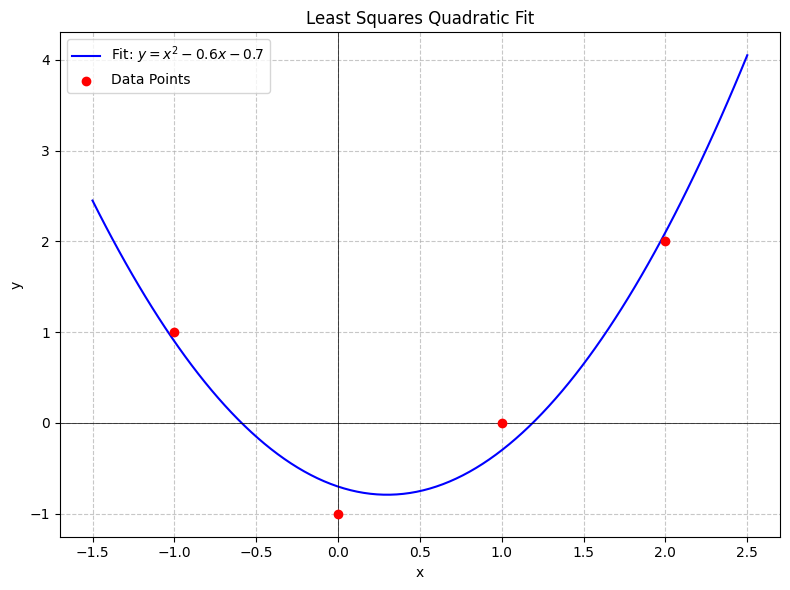

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Points: (-1, 1), (0, -1), (1, 0), (2, 2)
x_points = np.array([-1, 0, 1, 2])
y_points = np.array([1, -1, 0, 2])

# Coefficients: c0 = -0.7, c1 = -0.6, c2 = 1
def quadratic_model(x):
    return -0.7 - 0.6 * x + 1.0 * x**2

x_line = np.linspace(-1.5, 2.5, 100)
y_line = quadratic_model(x_line)

plt.figure(figsize=(8, 6))
plt.plot(x_line, y_line, label=r'Fit: $y = x^2 - 0.6x - 0.7$', color='blue')
plt.scatter(x_points, y_points, color='red', zorder=5, label='Data Points')

plt.title('Least Squares Quadratic Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5) # x-axis
plt.axvline(0, color='black', linewidth=0.5) # y-axis
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

Pure gravey. I'm liking the fit.